# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [9]:
# - Passo 1: Entendimento do Desafio
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

# - Passo 2: Entendimento da Área/Empresa

# - Passo 3: Extração/Obtenção de Dados


# - Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print (tabela.info())



,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


In [10]:
# !pip install seaborn
# !pip install matplotlib

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


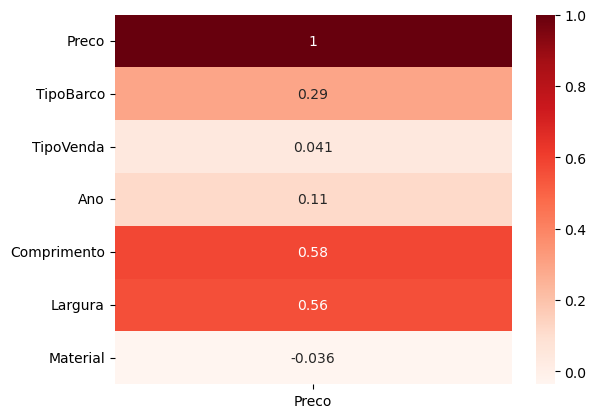

In [11]:
# - Passo 5: Análise Exploratória
    # calcular a corelação de cada uma das caracteristicas do produto
display(tabela.corr()[["Preco"]])

import seaborn as sns
import matplotlib.pyplot as plt

# cria o gráfico
sns.heatmap(tabela.corr()[["Preco"]], cmap="Reds", annot=True)

# depois exibe o grafico
plt.show()


In [12]:
# - Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
# Preparação

# separa as base em dados de x e y
y = tabela["Preco"]
# axis= 0 ´eixo das linhas, axis =1 eixo das colunas
x = tabela.drop("Preco", axis=1)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

In [13]:
# Criação e treino da IA

# importar a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [14]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))


0.4490324760735812
0.844302570917156


<function matplotlib.pyplot.show(close=None, block=None)>

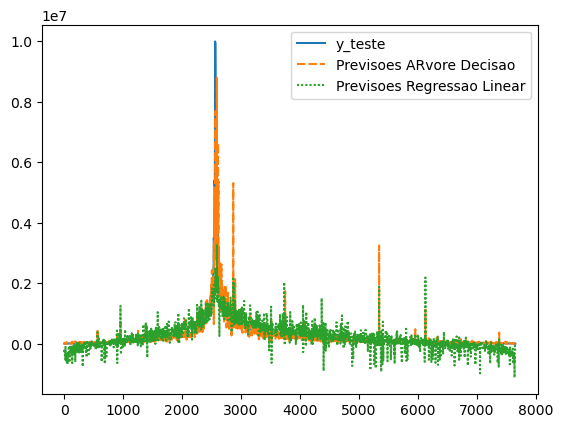

In [15]:
# - Passo 7: Interpretação de Resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsoes ARvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show

In [16]:
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5433.03416667  9302.05       21218.05      ]
